In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Shampoo sales for continuous 3 years
shampoo_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')

In [3]:
shampoo_df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
#let's display all the Month values in the dataset
shampoo_df['Month'].unique()

array(['1-01', '1-02', '1-03', '1-04', '1-05', '1-06', '1-07', '1-08',
       '1-09', '1-10', '1-11', '1-12', '2-01', '2-02', '2-03', '2-04',
       '2-05', '2-06', '2-07', '2-08', '2-09', '2-10', '2-11', '2-12',
       '3-01', '3-02', '3-03', '3-04', '3-05', '3-06', '3-07', '3-08',
       '3-09', '3-10', '3-11', '3-12'], dtype=object)

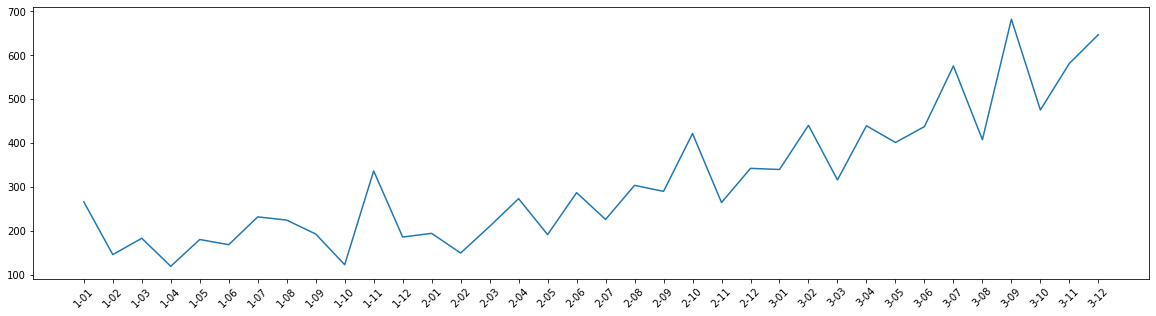

In [15]:
#let's plot the data to understand the patterns
plt.figure(figsize=(20,5))
plt.plot(shampoo_df['Month'], shampoo_df['Sales'])
plt.xticks(rotation=45)
plt.show()

Decomposition of the Timeseries data

In [33]:
components = seasonal_decompose(shampoo_df['Sales'], model='additive', period=12)

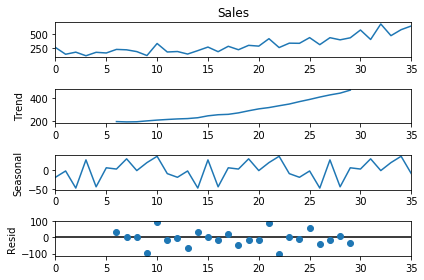

In [34]:
#let's visualise the individual components
components.plot()
plt.show()

Observations:               
1) The trend of the sales is increasing over a period of time                  
2) Based on the seasonality, we could infer sales is at its peak for some of the seasons            
3) On the other hand, extremely low sales for other months        

In [58]:
#let's split the data based on the year and compare it on monthly basis
Monthwise_df = pd.DataFrame(index=['year1', 'year2', 'year3'], columns=['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12'])

Monthwise_df.loc['year1'] = shampoo_df[shampoo_df['Month'].str.startswith('1-')]['Sales'].values
Monthwise_df.loc['year2'] = shampoo_df[shampoo_df['Month'].str.startswith('2-')]['Sales'].values
Monthwise_df.loc['year3'] = shampoo_df[shampoo_df['Month'].str.startswith('3-')]['Sales'].values


In [59]:
Monthwise_df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
year1,266,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9
year2,194.3,149.5,210.1,273.3,191.4,287,226,303.6,289.9,421.6,264.5,342.3
year3,339.7,440.4,315.9,439.3,401.3,437.4,575.5,407.6,682,475.3,581.3,646.9


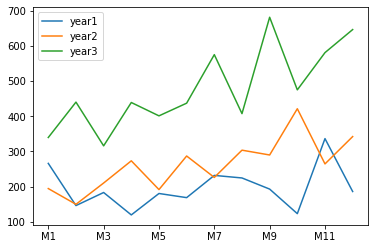

<Figure size 1440x360 with 0 Axes>

In [69]:
Monthwise_df.T.plot()
plt.figure(figsize=(20,5))
plt.show()

In [76]:
#spliting the dataset into test and train
#since we are dealing with timeseries data, we need to take continuity during the split
train_data = shampoo_df[~shampoo_df['Month'].isin(['3-10', '3-11', '3-12'])]
test_data = shampoo_df[shampoo_df['Month'].isin(['3-10', '3-11', '3-12'])]

In [78]:
test_data

,Month,Sales
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


Data Modelling of Time series

In [79]:
#Model1: Simple Exponential Smoothing
#let's download the appropriate packages

from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing

In [95]:
model = SimpleExpSmoothing(np.asarray(shampoo_df['Sales']))
model_fit = model.fit(optimized=True)
prediction = model_fit.forecast(test_data.shape[0])

In [96]:
prediction

array([583.6964677, 583.6964677, 583.6964677])

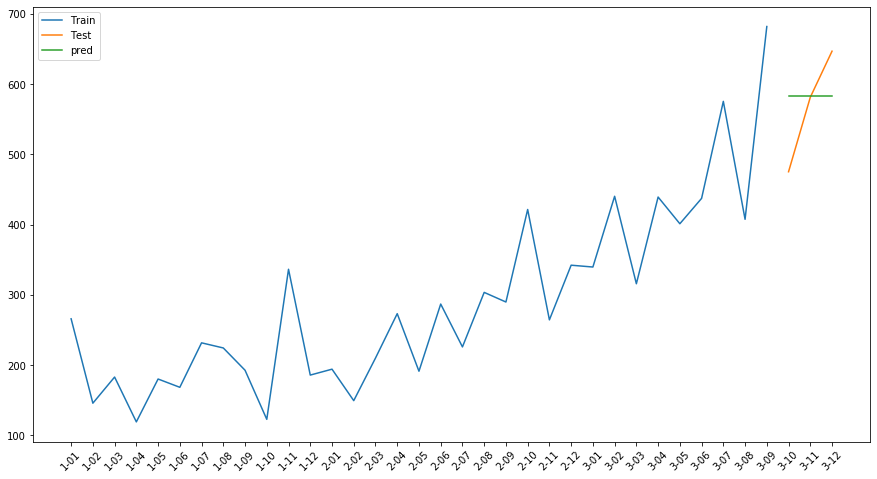

In [105]:
#let's plot the predicted and actual along with the entire series
plt.figure(figsize=(15,8))
plt.plot(train_data['Month'], train_data['Sales'], label='Train')
plt.plot(test_data['Month'], test_data['Sales'], label='Test')
plt.plot(test_data['Month'], prediction, label='pred')
plt.xticks(rotation=45)
plt.legend(loc='best') 

Conclusion:
As we have used simple exponential smoothing, the value of subsequent months have been leveled out based on the past data.